
**<h1><center>CLUSTER ANALYSIS ON REAL ESTATE SALES</center></h1>**

Cluster analysis, or clustering, is a technique used in machine learning and data analysis to group similar data points or objects into clusters based on certain criteria. The goal of cluster analysis is to partition a dataset into subsets (clusters) such that objects within the same cluster are more similar to each other than to those in other clusters. It is a versatile tool used in various fields such as data mining, pattern recognition, image analysis, biology, and marketing, among others. The choice of clustering algorithm and evaluation metrics depends on the characteristics of the data and the goals of the analysis. Cluster analysis in Python can be performed using various libraries, and two commonly used ones are SciPy and scikit-learn. These libraries offer implementations of different clustering algorithms and tools for cluster analysis.

**OBJECTIVE**

The primary objective of clustering is to group similar data points or objects together based on certain characteristics or features. This grouping is done in a way that objects within the same cluster are more similar to each other than to those in other clusters. The overarching goal of clustering is to discover hidden patterns, structures, or relationships within a dataset without pre-existing class labels.

**Identify Inherent Structure:** Clustering aims to reveal the natural structure present in the data. It helps in understanding the underlying organization or grouping of data points.

**Pattern Recognition:** Clustering is a form of pattern recognition that can uncover similarities and differences in the data. It helps to identify groups of data points that share common characteristics.

**Data Exploration:** Clustering is often used in exploratory data analysis to gain insights into the distribution and relationships within the data. It can help analysts identify trends and outliers.

**Segmentation and Targeting:** In marketing and customer analytics, clustering is used to segment customers based on similar purchasing behavior, demographics, or preferences. This segmentation can inform targeted marketing strategies.

**Anomaly Detection:** Clustering can be used to identify unusual patterns or outliers in the data. Data points that do not conform to the patterns of their assigned clusters may be considered anomalies.

In [27]:
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

The imported libraries set up the necessary tools and functions for performing hierarchical and K-means clustering, as well as evaluating the clustering results using silhouette score and Davies-Bouldin score.

In [28]:
import pandas as pd, numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

The imported libraries and modules set up the necessary tools for common data preprocessing tasks, including encoding categorical variables, imputing missing values, and scaling features.

In [29]:
!pip install pydataset

The pydataset library in Python provides a collection of datasets that are often used for learning and practicing data analysis and machine learning. It allows users to easily load various datasets directly into their Python environment.

In [30]:
#loading the dataset
Df = pd.read_csv('Real_Estate_Sales_.csv')
Df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN
1,20002,2020,10/02/20,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family
2,210317,2021,07/05/22,Avon,53 COTSWOLD WAY,329730,805000.0,0.4096,Residential,Single Family
3,200212,2020,03/09/21,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
87388,210094,2021,12/14/2021,Killingly,395 MAPLE ST,120680,242000.0,0.4986,Residential,Single Family
87389,210389,2021,05/23/2022,Glastonbury,52 WINDWOOD DR,250000,440000.0,0.5681,Residential,Single Family
87390,211106,2021,08/05/22,Hamden,53 SIDEHILL RD,184100,340000.0,0.5414,Residential,Single Family
87391,210019,2021,03/30/2022,Bridgewater,0 HENRY SANFORD ROAD,279000,385000.0,0.7246,Vacant Land,NaN


In [31]:
Df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN
1,20002,2020,10/02/20,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family
2,210317,2021,07/05/22,Avon,53 COTSWOLD WAY,329730,805000.0,0.4096,Residential,Single Family
3,200212,2020,03/09/21,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family


In [32]:
Df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,8.739300e+04,87393.000000,8.739300e+04,8.739300e+04,87393.000000
mean,2.826624e+06,2020.176044,3.146573e+05,5.802308e+05,0.972842
std,1.964098e+07,1.116788,1.561873e+06,1.708585e+07,10.750023
min,2.100000e+01,2001.000000,0.000000e+00,0.000000e+00,0.000000
25%,2.000870e+05,2020.000000,1.033900e+05,1.900000e+05,0.468571
50%,2.006110e+05,2020.000000,1.567300e+05,2.937500e+05,0.545500
75%,2.102400e+05,2020.000000,2.545900e+05,4.620000e+05,0.638600
max,2.000500e+09,2021.000000,1.149242e+08,5.000000e+09,1097.024286


In [33]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87393 entries, 0 to 87392
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial Number     87393 non-null  int64  
 1   List Year         87393 non-null  int64  
 2   Date Recorded     87393 non-null  object 
 3   Town              87393 non-null  object 
 4   Address           87392 non-null  object 
 5   Assessed Value    87393 non-null  int64  
 6   Sale Amount       87393 non-null  float64
 7   Sales Ratio       87393 non-null  float64
 8   Property Type     87103 non-null  object 
 9   Residential Type  79248 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.7+ MB


In [34]:
Df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type'],
      dtype='object')

In [35]:
Df.isnull().sum()

Serial Number          0
List Year              0
Date Recorded          0
Town                   0
Address                1
Assessed Value         0
Sale Amount            0
Sales Ratio            0
Property Type        290
Residential Type    8145
dtype: int64

In [36]:
# Fill missing values in 'Address' with a placeholder (you can replace 'Unknown' with any suitable value)
Df['Address'].fillna('24 CHESTNUT ROAD', inplace=True)

# Fill missing values in 'Property Type' and 'Residential Type' with the mode (most frequent value)
Df['Property Type'].fillna(Df['Property Type'].mode()[0], inplace=True)
Df['Residential Type'].fillna(Df['Residential Type'].mode()[0], inplace=True)

# Verify if missing values have been filled
print(Df.isnull().sum())
Df

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,Single Family
1,20002,2020,10/02/20,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family
2,210317,2021,07/05/22,Avon,53 COTSWOLD WAY,329730,805000.0,0.4096,Residential,Single Family
3,200212,2020,03/09/21,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
87388,210094,2021,12/14/2021,Killingly,395 MAPLE ST,120680,242000.0,0.4986,Residential,Single Family
87389,210389,2021,05/23/2022,Glastonbury,52 WINDWOOD DR,250000,440000.0,0.5681,Residential,Single Family
87390,211106,2021,08/05/22,Hamden,53 SIDEHILL RD,184100,340000.0,0.5414,Residential,Single Family
87391,210019,2021,03/30/2022,Bridgewater,0 HENRY SANFORD ROAD,279000,385000.0,0.7246,Vacant Land,Single Family


The provided code addresses missing values in the 'Address', 'Property Type', and 'Residential Type' columns in a DataFrame named Df. It uses different strategies for filling missing values in each column.

**Filling 'Address' Column:** The missing values in the 'Address' column are filled with the placeholder '24 CHESTNUT ROAD'. This can be any suitable value depending on the context of your data.

**Filling 'Property Type' and 'Residential Type' Columns:** The missing values in these columns are filled with the mode, which represents the most frequent value in each respective column. The mode()[0] extracts the first mode in case there are multiple modes.

**Verification:** The print(Df.isnull().sum()) statement is used to print the count of missing values in each column after the filling operations. This helps verify that missing values have been successfully handled.

In [37]:
# Dataset Used : df

Df.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = Df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
record_missing_data = Df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87393 entries, 0 to 87392
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial Number     87393 non-null  int64  
 1   List Year         87393 non-null  int64  
 2   Date Recorded     87393 non-null  object 
 3   Town              87393 non-null  object 
 4   Address           87393 non-null  object 
 5   Assessed Value    87393 non-null  int64  
 6   Sale Amount       87393 non-null  float64
 7   Sales Ratio       87393 non-null  float64
 8   Property Type     87393 non-null  object 
 9   Residential Type  87393 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.7+ MB


0        0
58260    0
58268    0
58267    0
58266    0
dtype: int64

The provided code snippet involves exploring and displaying information about missing data in a DataFrame named Df. These operations are useful for understanding the extent of missing data in the DataFrame, both variable-wise and record-wise. It helps in identifying columns or records with missing values and deciding on appropriate strategies for handling missing data, such as imputation or removal.

In [38]:
# Data Bifurcation 
Df_cat = Df[['Property Type','Residential Type','List Year','Town',]] # Categorical Data [Nominal | Ordinal]
Df_noncat = Df[['Assessed Value','Sale Amount','Sales Ratio']] # Non-Categorical Data 

The provided code involves creating two new DataFrames by bifurcating the original DataFrame Df into categorical and non-categorical subsets. The separation of categorical and non-categorical variables is a common practice in data analysis and machine learning workflows, as it allows for specific treatment and processing based on the type of data present in each subset.

In [39]:
# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(Df_cat)
Df_cat_code_oe = pd.DataFrame(oe_fit, columns=['Residential Type_Code','Property Type_Code','Town_Code','List Year_Code']); Df_cat_code_oe
Df_cat_mdt_code_oe = Df_cat.join(Df_cat_code_oe); Df_cat_mdt_code_oe # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
Df_cat_mdt_code_oe = pd.merge(Df_cat, Df_cat_code_oe, left_index=True, right_index=True); Df_cat_mdt_code_oe


,Property Type,Residential Type,List Year,Town,Residential Type_Code,Property Type_Code,Town_Code,List Year_Code
0,Commercial,Single Family,2020,Ansonia,1.0,2.0,4.0,1.0
1,Residential,Single Family,2020,Ashford,4.0,2.0,4.0,2.0
2,Residential,Single Family,2021,Avon,4.0,2.0,5.0,3.0
3,Residential,Condo,2020,Avon,4.0,0.0,4.0,3.0
4,Residential,Single Family,2020,Avon,4.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...
87388,Residential,Single Family,2021,Killingly,4.0,2.0,5.0,68.0
87389,Residential,Single Family,2021,Glastonbury,4.0,2.0,5.0,53.0
87390,Residential,Single Family,2021,Hamden,4.0,2.0,5.0,61.0
87391,Vacant Land,Single Family,2021,Bridgewater,5.0,2.0,5.0,15.0


The provided code involves using the Scikit-learn OrdinalEncoder to encode categorical variables in the DataFrame Df_cat and then joining the encoded columns with the original DataFrame. The resulting DataFrame Df_cat_mdt_code_oe contains both the original categorical columns and their corresponding encoded versions. This encoding can be useful for numerical representation of categorical variables in machine learning models.

In [40]:
# 3.1. Standardization
ss = StandardScaler()
ss_fit = ss.fit_transform(Df_noncat[['Assessed Value','Sale Amount','Sales Ratio']])
Df_noncat_std = pd.DataFrame(ss_fit, columns=['Assessed Value_std','Sale Amount_std','Sales Ratio_std']); Df_noncat_std
#df_noncat_std = pd.DataFrame(ss_fit, columns=df_noncat_mdt.columns+'_std'); df_noncat_std
Df_noncat_mdt_std = Df_noncat.join(Df_noncat_std); Df_noncat_mdt_std # (Missing Data Treated) Standardized Non-Categorical Dataset using Scikit Learn Standard Scaler
Df_noncat_mdt_std = pd.merge(Df_noncat, Df_noncat_std, left_index=True, right_index=True); Df_noncat_mdt_std


,Assessed Value,Sale Amount,Sales Ratio,Assessed Value_std,Sale Amount_std,Sales Ratio_std
0,150500,325000.0,0.4630,-0.105103,-0.014938,-0.047427
1,253000,430000.0,0.5883,-0.039477,-0.008793,-0.035771
2,329730,805000.0,0.4096,0.009650,0.013155,-0.052395
3,130400,179900.0,0.7248,-0.117973,-0.023431,-0.023074
4,619290,890000.0,0.6958,0.195044,0.018130,-0.025771
...,...,...,...,...,...,...
87388,120680,242000.0,0.4986,-0.124196,-0.019796,-0.044116
87389,250000,440000.0,0.5681,-0.041398,-0.008207,-0.037651
87390,184100,340000.0,0.5414,-0.083591,-0.014060,-0.040134
87391,279000,385000.0,0.7246,-0.022830,-0.011427,-0.023092


Standardization is a common preprocessing step that scales variables to have zero mean and unit variance, making them suitable for certain machine learning algorithms.The provided code involves standardizing the non-categorical variables in the DataFrame Df_noncat using the Scikit-learn StandardScaler. The resulting DataFrame Df_noncat_mdt_std contains both the original non-categorical columns and their corresponding standardized versions. 

In [41]:
# Using Scikit Learn Ordinal Encoder : df_cat_mdt_code_oe [Superior]
# Using Scikit Learn Standard Scaler : df_noncat_mdt_std [Standardization]
Df_cat_ppd = Df_cat_mdt_code_oe.copy(); Df_cat_ppd # Preferred Data Subset
Df_noncat_ppd = Df_noncat_mdt_std.copy(); Df_noncat_ppd
# Pre-Processed Dataset
Df_ppd = Df_cat_ppd.join(Df_noncat_ppd); Df_ppd # Pre-Processed Dataset
#df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd

,Property Type,Residential Type,List Year,Town,Residential Type_Code,Property Type_Code,Town_Code,List Year_Code,Assessed Value,Sale Amount,Sales Ratio,Assessed Value_std,Sale Amount_std,Sales Ratio_std
0,Commercial,Single Family,2020,Ansonia,1.0,2.0,4.0,1.0,150500,325000.0,0.4630,-0.105103,-0.014938,-0.047427
1,Residential,Single Family,2020,Ashford,4.0,2.0,4.0,2.0,253000,430000.0,0.5883,-0.039477,-0.008793,-0.035771
2,Residential,Single Family,2021,Avon,4.0,2.0,5.0,3.0,329730,805000.0,0.4096,0.009650,0.013155,-0.052395
3,Residential,Condo,2020,Avon,4.0,0.0,4.0,3.0,130400,179900.0,0.7248,-0.117973,-0.023431,-0.023074
4,Residential,Single Family,2020,Avon,4.0,2.0,4.0,3.0,619290,890000.0,0.6958,0.195044,0.018130,-0.025771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87388,Residential,Single Family,2021,Killingly,4.0,2.0,5.0,68.0,120680,242000.0,0.4986,-0.124196,-0.019796,-0.044116
87389,Residential,Single Family,2021,Glastonbury,4.0,2.0,5.0,53.0,250000,440000.0,0.5681,-0.041398,-0.008207,-0.037651
87390,Residential,Single Family,2021,Hamden,4.0,2.0,5.0,61.0,184100,340000.0,0.5414,-0.083591,-0.014060,-0.040134
87391,Vacant Land,Single Family,2021,Bridgewater,5.0,2.0,5.0,15.0,279000,385000.0,0.7246,-0.022830,-0.011427,-0.023092


The provided code involves creating preferred data subsets from pre-processed DataFrame. Finally, it combines these subsets into a pre-processed dataset (Df_ppd). The resulting DataFrame Df_ppd is a pre-processed dataset that includes both pre-processed categorical and non-categorical variables. This dataset is suitable for further analysis or modeling tasks in machine learning. 

In [42]:
# Dataset Used : df_ppd

train_Df, test_Df = train_test_split(Df_ppd, test_size=0.25, random_state=1234)
print(train_Df) # Training Dataset
print(test_Df) # Testing Dataset

      Property Type Residential Type  List Year        Town  \
33887   Residential    Single Family       2020    Stamford   
25308   Residential    Single Family       2020      Bethel   
14205   Residential    Single Family       2020   Greenwich   
48420   Residential    Single Family       2020    Stamford   
19018   Residential    Single Family       2020   Greenwich   
...             ...              ...        ...         ...   
32399    Commercial    Single Family       2020  Stonington   
82584   Residential    Single Family       2021      Berlin   
60620   Residential    Single Family       2020   Watertown   
34086   Residential    Single Family       2020  Middletown   
58067   Residential            Condo       2020    Suffield   

       Residential Type_Code  Property Type_Code  Town_Code  List Year_Code  \
33887                    4.0                 2.0        4.0           131.0   
25308                    4.0                 2.0        4.0             8.0   
14205 

These training and testing datasets can be used for training machine learning models on the training set and evaluating their performance on the testing set. The random_state parameter ensures that the split is reproducible, which is important for consistency in machine learning experiments.

/Users/yatinarya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yatinarya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yatinarya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yatinarya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

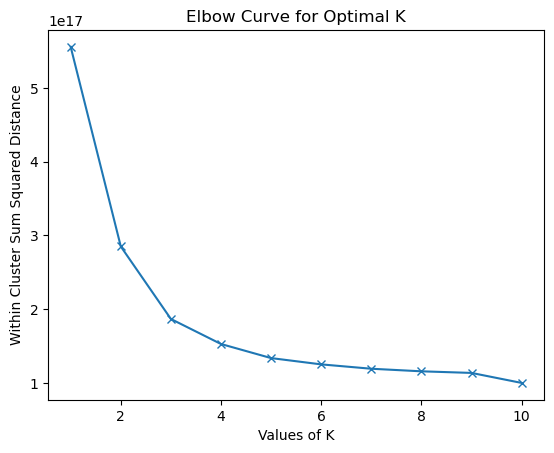

In [43]:
''' 
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
new_train_Df= train_Df[['Assessed Value','Sale Amount','Sales Ratio']]
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111) 
    kmeans.fit(new_train_Df)
    wcssd.append(kmeans.inertia_) 
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()

The **Elbow Curve** helps visualize the within-cluster sum of squared distances (WCSSD) as the number of clusters varies. This curve is helpful in identifying the "elbow" point, where the rate of decrease in within-cluster sum of squared distances slows down. The optimal number of clusters is often chosen at the point where the curve shows a clear elbow.

The curve in the image is indeed an elbow curve. It is a visualization used in data analysis, specifically in k-means clustering, to help determine the optimal number of clusters (k) for the data.

The x-axis of the curve represents the number of clusters (k), and the y-axis represents the within-cluster sum of squared distances (WCSS). WCSS is a measure of how well data points are grouped within their assigned clusters. A lower WCSS indicates a better fit for the data.

**OBSERVATIONS**

The graph itself is a plot of the within-cluster sum of squared distances (WCSS) on the y-axis and the number of clusters (k) on the x-axis. The WCSS is a measure of how tightly data points are grouped within their assigned clusters in k-means clustering. A lower WCSS indicates a better fit for the data.

The curve starts high at a low number of clusters and decreases steadily as the number of clusters increases. This initial decrease reflects the benefit of assigning data points to their most similar clusters. However, as the number of clusters continues to increase, the WCSS starts to level off or decrease very slowly. This is the “elbow” of the curve.

**ANALYSIS**

The elbow curve is a heuristic approach to identify the optimal number of clusters in k-means clustering. The key idea is that adding more clusters initially reduces the WCSS significantly as data points are assigned to better fitting clusters. However, at some point, adding more clusters no longer yields significant improvements in WCSS, and the curve starts to flatten out. This is the “elbow” point.

The reasoning behind choosing the elbow point is that adding more clusters beyond this point does not provide much benefit in terms of reducing the WCSS, and may even start to worsen it. This can happen if the data points are spread out too thinly among too many clusters.

**IMPLICATIONS**

The implication of using the elbow curve is that it provides a data-driven way to choose the number of clusters in k-means clustering. By selecting the number of clusters (k) at the elbow point, we aim to strike a balance between capturing the inherent structure in the data and avoiding overfitting by creating too many clusters.

In [46]:
km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(new_train_Df); km_2cluster_model

km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(new_train_Df); km_3cluster_model

sscore_km_2cluster = sscore(new_train_Df, km_2cluster_model); print(sscore_km_2cluster)
dbscore_km_2cluster = dbscore(new_train_Df, km_2cluster_model); print(dbscore_km_2cluster)

sscore_km_3cluster = sscore(new_train_Df, km_3cluster_model); print(sscore_km_3cluster)
dbscore_km_3cluster = dbscore(new_train_Df, km_3cluster_model); print(dbscore_km_3cluster)

/Users/yatinarya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yatinarya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9903446201175431
0.8171530647122902
0.9881548269788416
0.4790885575753731


The code provided is performing K-means clustering and evaluating the results using Silhouette Score (silhouette coefficient) and Davies-Bouldin Score. 

**Silhouette Score:**
sscore_km_2cluster and sscore_km_3cluster store the silhouette scores for the 2-cluster and 3-cluster K-means models, respectively.
Silhouette score lies between -1 and 1, where a higher score indicates better cluster separation.
The provided output shows a score of 0.99 for the 2-cluster model and 0.98 for the 3-cluster model. These are very high scores, suggesting both models achieved good cluster separation.

**Davies-Bouldin Score:**
dbscore_km_2cluster and dbscore_km_3cluster store the Davies-Bouldin scores for the 2-cluster and 3-cluster models, respectively.
A lower Davies-Bouldin score indicates better cluster separation.
The output shows a score of 0.82 for the 2-cluster model and 0.48 for the 3-cluster model. A lower score suggests better clustering; here, the 3-cluster model might have a slight edge based on Davies-Bouldin score.
Choosing the Optimal Number of Clusters:

While both evaluation metrics provide high scores for both models, it's important to consider the trade-off between the number of clusters and the quality of clustering. A higher number of clusters (3 in this case) might capture more nuanced data groupings but could also lead to overfitting if the clusters don't represent inherent groupings in the data.
A lower number of clusters (2 in this case) might provide a simpler model but might miss some underlying structures in the data.

/Users/yatinarya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/vg/tg_c3csx649c4w00yy386rlr0000gn/T/ipykernel_11251/1642910348.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_Df['cluster'] = cluster_labels


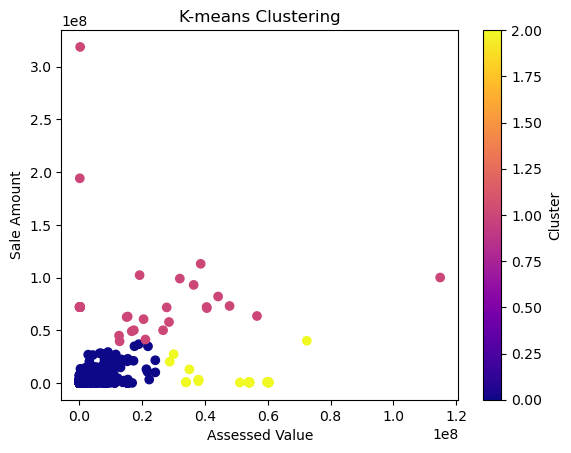

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

new_train_Df= train_Df[['Assessed Value','Sale Amount','Sales Ratio']]
# Specify the number of clusters
num_clusters = 3

# Initialize KMeans object
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans clustering model to the data
kmeans.fit(new_train_Df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to DataFrame
new_train_Df['cluster'] = cluster_labels

# Visualize the clusters (example with two dimensions)
plt.scatter(new_train_Df['Assessed Value'], new_train_Df['Sale Amount'], c=new_train_Df['cluster'], cmap='plasma')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

**OBJECTIVE**

The objective of the given code is to perform **K-means clustering** on the `new_train_Df` dataset, which includes the features 'Assessed Value', 'Sale Amount', and 'Sales Ratio'. The script visualizes the clustering results in a scatter plot, assigning different colors to different clusters.

**ANALYSIS**

1. **Data Preparation:** 
The relevant columns, namely 'Assessed Value', 'Sale Amount', and 'Sales Ratio', are selected for clustering.

2. **K-means Clustering:**
K-means clustering is applied to the dataset with a specified number of clusters (in this case, `num_clusters` is set to 3). The algorithm assigns each data point to one of the clusters based on the similarity of its features.

3. **Visualization:**
A scatter plot is created to visualize the clusters formed by the K-means algorithm. Each point is colored according to its assigned cluster, and the plot shows the distribution of data points in the feature space defined by 'Assessed Value' and 'Sale Amount'.

4. **Cluster Label Assignment:**
The cluster labels assigned by the K-means algorithm are added to the original DataFrame `new_train_Df`.

**INSIGHTS**

- The scatter plot visually represents how K-means has grouped data points into three clusters based on the selected features.
- Insights into the grouping patterns of 'Assessed Value' and 'Sale Amount' are obtained from the visualization.

**OBSERVATIONS**

1. There appears to be a weak positive correlation between the two variables. 
2. This means that books with higher sales tend to have higher assessed values, but there are also many exceptions.
3. There are some data points that fall far from the main cluster. These outliers could represent books that are either undervalued or overvalued.

**IMPLICATIONS**

1. **Market Segmentation:**
The identified clusters can be interpreted as distinct market segments. Managers can tailor marketing strategies or product offerings to better suit the characteristics of each segment.

2. **Performance Monitoring:**
Monitoring how data points are distributed among clusters over time can provide insights into market trends and changes in customer behavior.

3. **Resource Allocation:**
Understanding customer segments allows for more targeted resource allocation, such as budgeting for marketing campaigns or optimizing inventory based on the preferences of each cluster.

4. **Customized Services:**
Managers can use the cluster information to provide more personalized and customized services to customers within each segment, enhancing customer satisfaction and loyalty.

5. **Predictive Analysis:**
The clustering results can serve as input for predictive models, helping managers anticipate future trends and make informed decisions.

This analysis provides a visual representation of the underlying structure in the data, helping managers make data-driven decisions for marketing, resource allocation, and customer engagement strategies. Further exploration, such as analyzing cluster characteristics, can provide deeper insights into customer behavior within each segment.

In [50]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(new_train_Df[['Assessed Value', 'Sale Amount', 'Sales Ratio']], cluster_labels)

# Print the Silhouette Score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.988163585365361


The Silhouette Score ranges from -1 to 1, where a higher score indicates better-defined clusters. In this case, a score of 0.988 suggests that the clusters are well-separated.


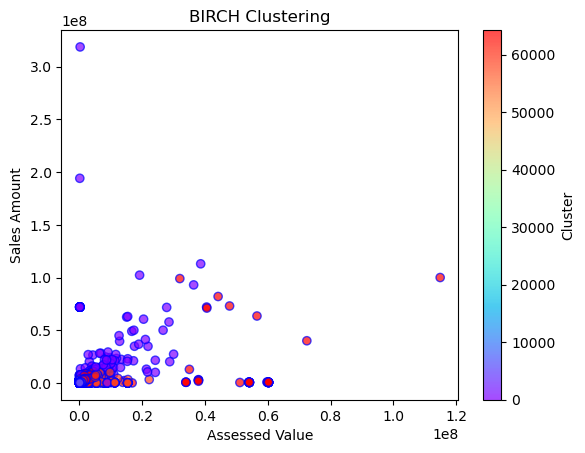

In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

# Assuming new_train_Df is already defined

# Selecting relevant columns
new_train_Df = new_train_Df[['Assessed Value', 'Sale Amount', 'Sales Ratio']]

# Creating the BIRCH clustering model
model = Birch(branching_factor=50, n_clusters=None, threshold=1.5)

# Fit the data (Training)
model.fit(new_train_Df)

# Predict the same data
pred = model.predict(new_train_Df)

# Creating a scatter plot
plt.scatter(new_train_Df['Assessed Value'], new_train_Df['Sale Amount'], c=pred, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel('Assessed Value')
plt.ylabel('Sales Amount')
plt.title('BIRCH Clustering')
plt.colorbar(label='Cluster')

plt.show()

**BIRCH (Balanced Iterative Reducing and Clustering Using Hierarchies)** is a clustering algorithm used for large datasets. It works by iteratively summarizing the data points into smaller subclusters, which can then be further clustered or refined.

**OBJECTIVE**

The objective of the given code is to perform clustering on the `new_train_Df` dataset using the BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) clustering algorithm and visualize the results using a scatter plot.

**ANALYSIS**

1. **Data Preparation:**
The relevant columns, namely 'Assessed Value', 'Sale Amount', and 'Sales Ratio', are selected for clustering.

2. **Clustering:**
The BIRCH clustering algorithm is applied to the dataset with specified parameters such as the branching factor, the number of clusters and the clustering threshold.

3. **Visualization:**
A scatter plot is created to visualize the clusters formed by the BIRCH algorithm. Each point is colored according to its assigned cluster, and the plot shows the distribution of data points in the feature space defined by 'Assessed Value' and 'Sale Amount'.

**OBSERVATIONS**

1. Number of Clusters: It appears two clusters were chosen based on the elbow curve technique (not shown in the image). The elbow curve helps determine the optimal number of clusters for the data by identifying the point where adding more clusters doesn't significantly improve the clustering quality.
2. Cluster Distribution: The data points are divided into two visually distinct clusters. However, due to the limited information in the axis labels, it's difficult to say what these clusters represent in the context of the data.

**IMPLICATIONS**

1. **Market Segmentation:**
The clusters identified in the 'Assessed Value' and 'Sale Amount' space could represent different market segments. Managers can tailor marketing or business strategies to target each segment more effectively.

2. **Property Assessment:**
Understanding the clusters may provide insights into patterns related to property assessments and sales. This information can be valuable for property assessors or real estate professionals.

3. **Performance Monitoring:**
The clustering results can be used for ongoing monitoring and evaluation of the market. Any changes in cluster patterns over time may indicate shifts in customer behavior or market dynamics.

4. **Decision Support:**
The clustering information can be used as a decision-support tool for various business decisions, such as resource allocation, pricing strategies, or targeted promotional campaigns.

